# Libraries and Data Information

In [156]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

### The data set includes information about:

- This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. 

- The dataset has been taken from Canada Government official open data website. This is a compiled version.

- This contains data over a period of 7 years. There are total 7385 rows and 12 columns. 

### Feature Information

**Make:** Vehicle brand

**Model:** Vehicle model
- 4WD/4X4 = Four-wheel drive

- AWD = All-wheel drive

- FFV = Flexible-fuel vehicle

- SWB = Short wheelbase

- LWB = Long wheelbase

- EWB = Extended wheelbase


**Vehicle Class:** Vehicle class (e.g. small car, sports car, van, etc.)

**Engine Size (L):** Vehicle engine displacement (in liters)

**Cylinders:** Number of vehicle cylinders

**Transmission:** Vehicle gearbox type (manual or automatic)
- A = Automatic

- AM = Automated manual

- AS = Automatic with select shift

- AV = Continuously variable

- M = Manual

- 3 - 10 = Number of gears

**Fuel Type:** Type of fuel used (e.g. gasoline, diesel, hybrid, etc.)
- X = Regular gasoline

- Z = Premium gasoline

- D = Diesel

- E = Ethanol (E85)

- N = Natural gas

**Fuel Consumption City (L/100 km):** Fuel consumption city (liters/100 km)

**Fuel Consumption Hwy (L/100 km):** Hwy fuel consumption (liters/100 km)

**Fuel Consumption Comb (L/100 km):** Average fuel consumption (liters/100 km)

**Fuel Consumption Comb (mpg):** Fuel economy (miles per gallon)
- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

**CO2 Emissions (g/km):** CO2 emissions per vehicle (grams/kilometer)

# Read and Check Data

In [157]:
co2 = pd.read_csv("co2.csv")
df = co2.copy()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [158]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [159]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : "model",
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': "cylinders",
    'Transmission' : "transmission",
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_columns, axis='columns', inplace=True)

In [160]:
# let's check our missing values
df.isnull().sum()

make                 0
model                0
vehicle_class        0
engine_size          0
cylinders            0
transmission         0
fuel_type            0
fuel_cons_city       0
fuel_cons_hwy        0
fuel_cons_comb       0
mpgfuel_cons_comb    0
co2                  0
dtype: int64

In [161]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [162]:
# Let's observe our data in a table 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 10
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [163]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


- The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
- The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

In [164]:
# Duplicated data
df[df.duplicated() == True]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [165]:
df.drop_duplicates(inplace=True)

In [166]:
df[df.duplicated() == True]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2


# Categorical Features

* Let's look at the distribution of our categorical characteristics with a bar graph

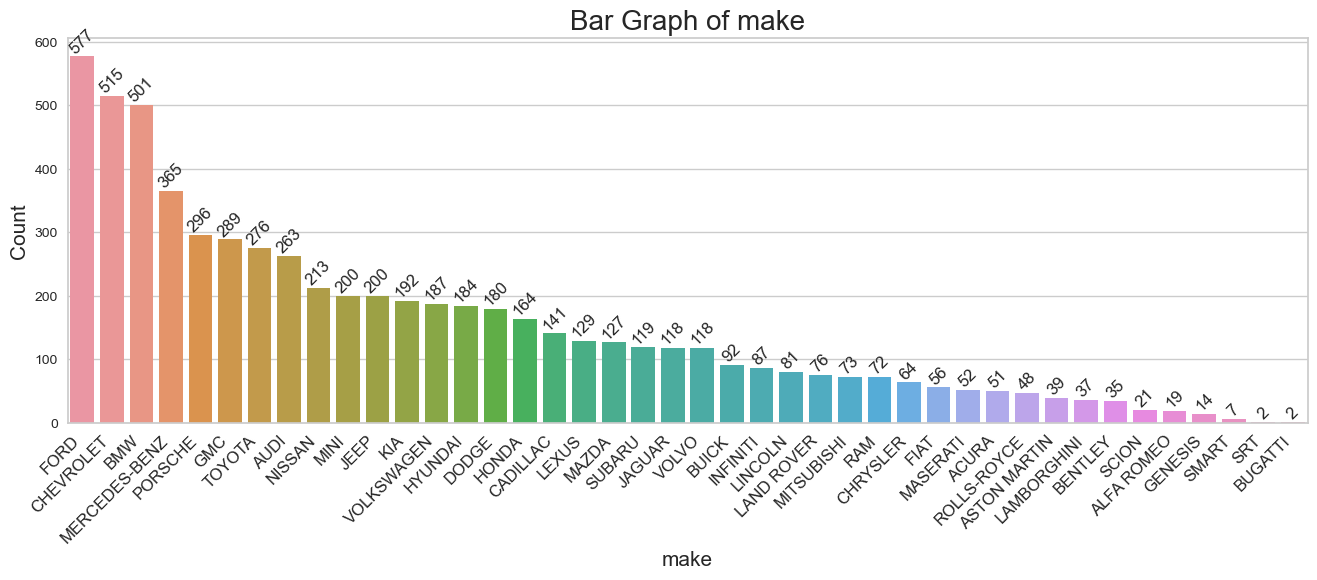

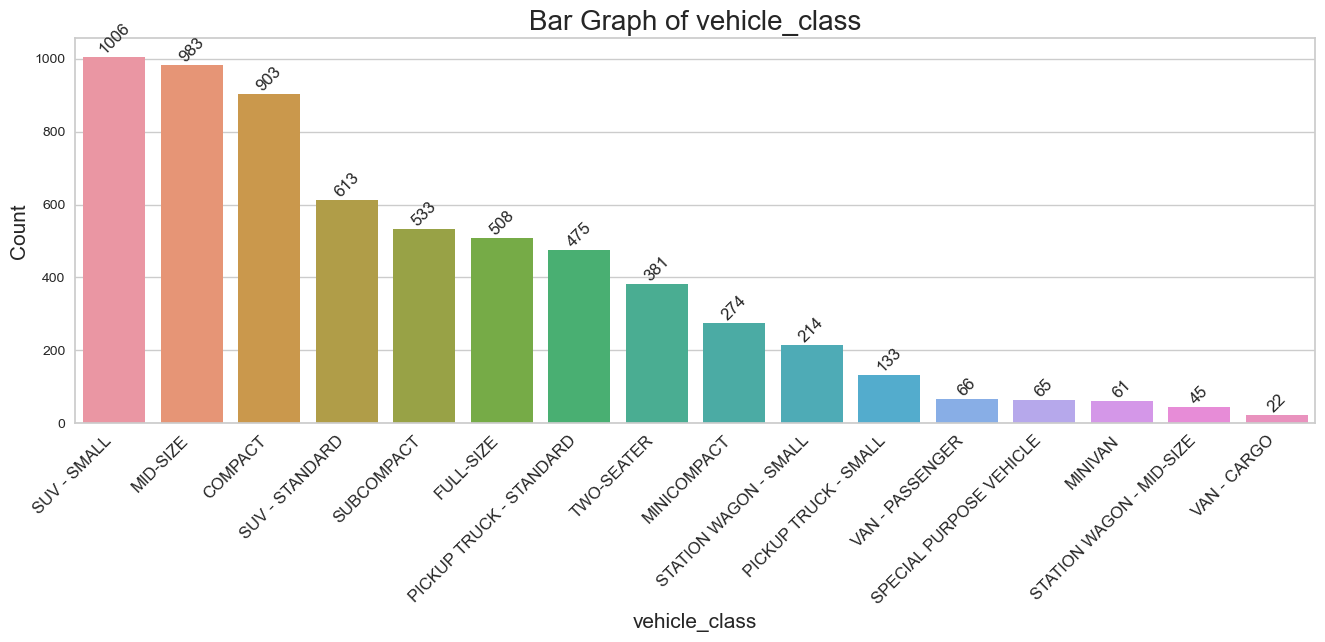

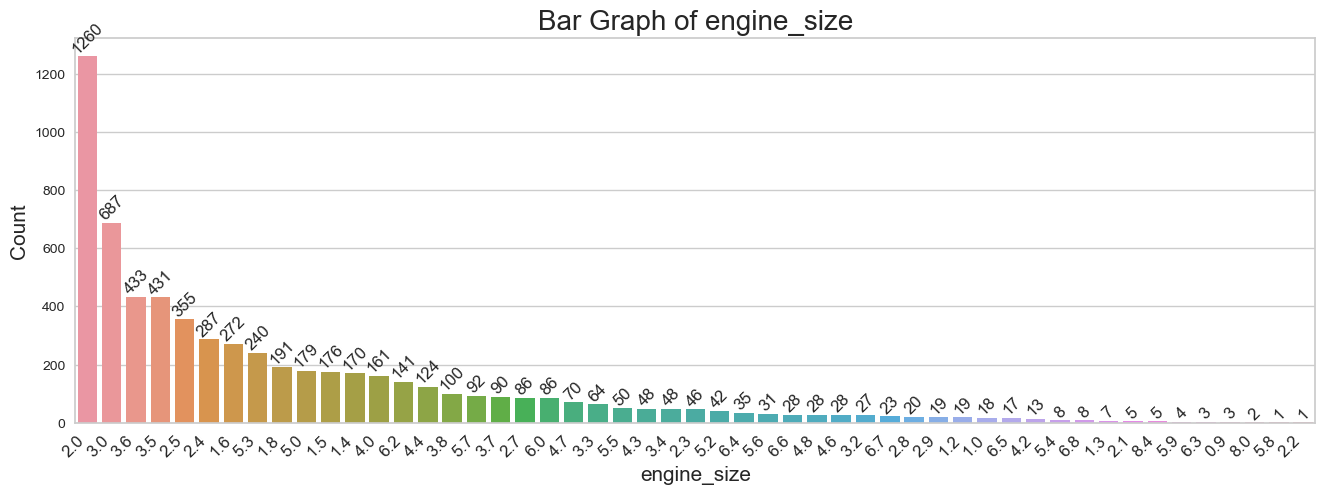

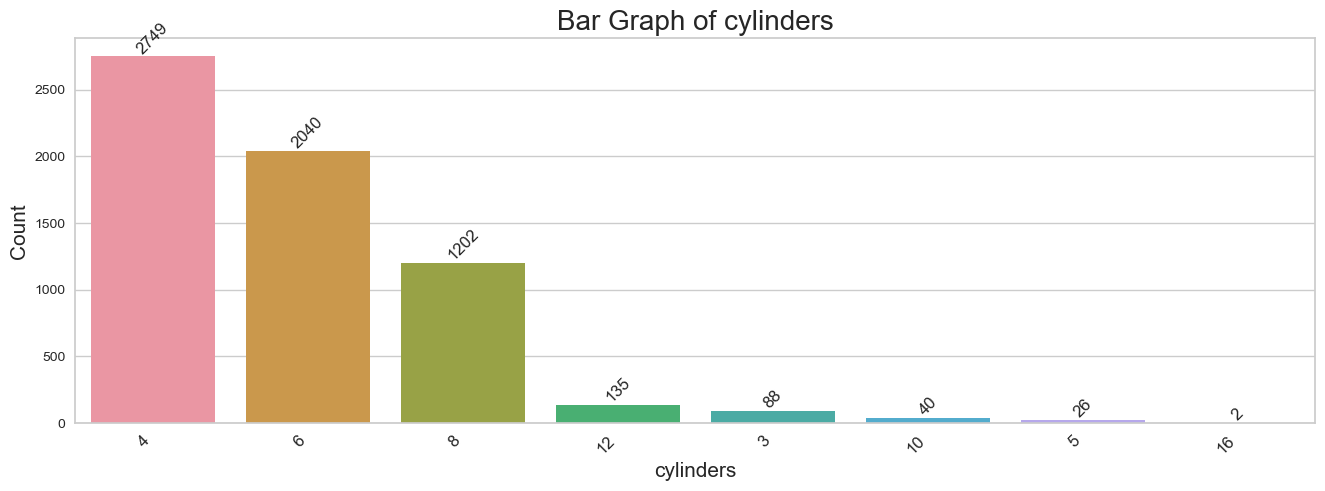

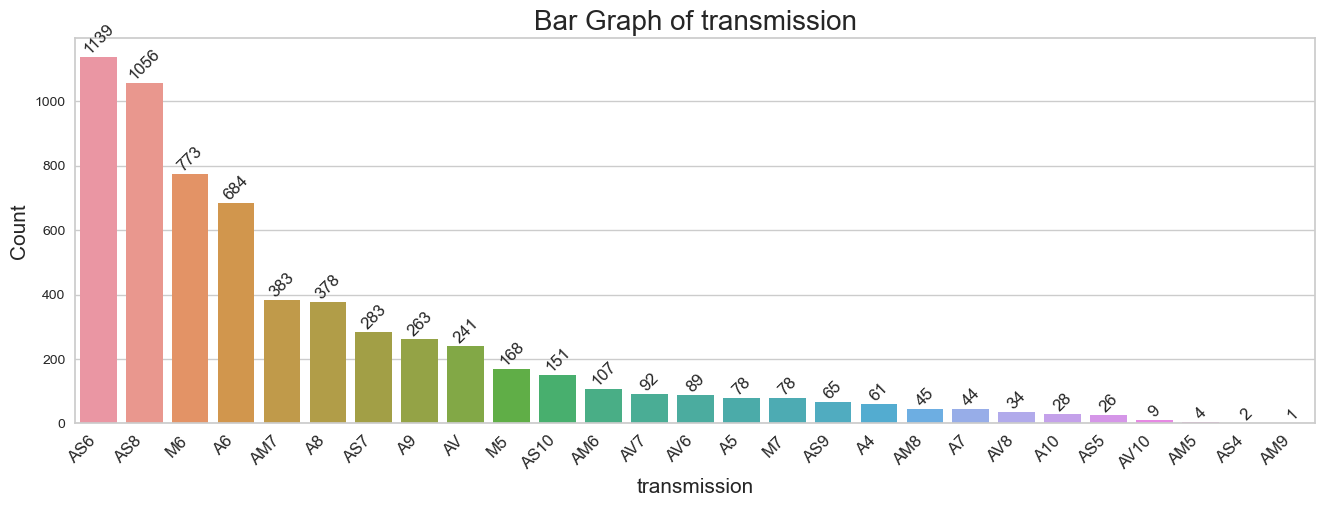

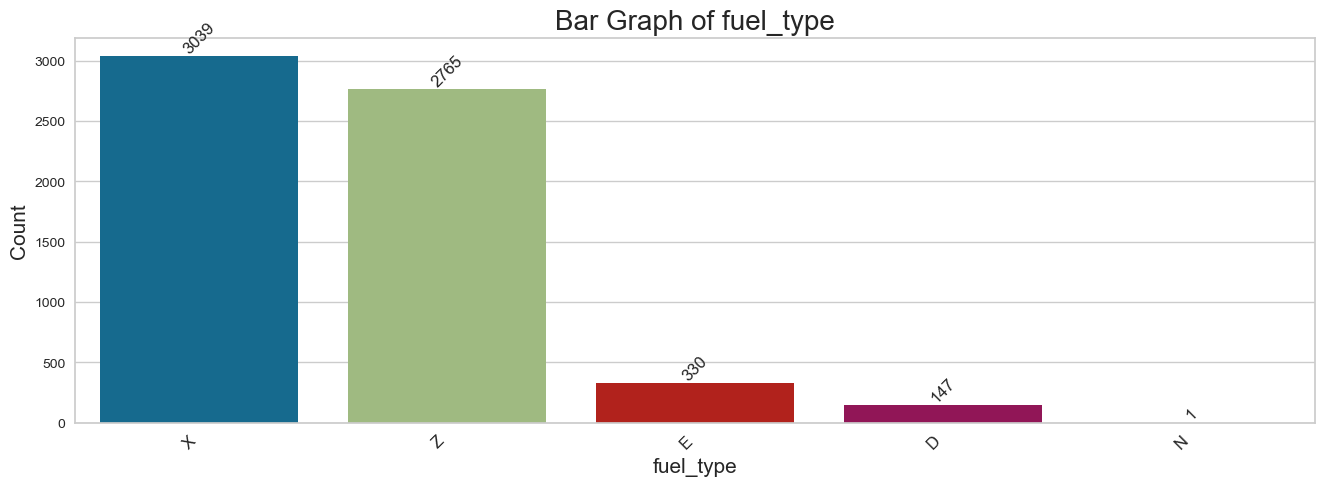

In [167]:
def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(16, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

plot_bar_graphs(df, cat_features)

As can be seen from the graphs above:

* The number of vehicles consuming diesel, ethanol and natural gas fuel in the data set is very small.
* Widespread use of AS6, AS8, M6, A6, A9 as transmission options
* 4, 6, 8 are commonly used as cylinders option
* Engine Size (L) with 2.0 and 3.0 options in density
* The dataset is generally dominated by smaller sized vehicles

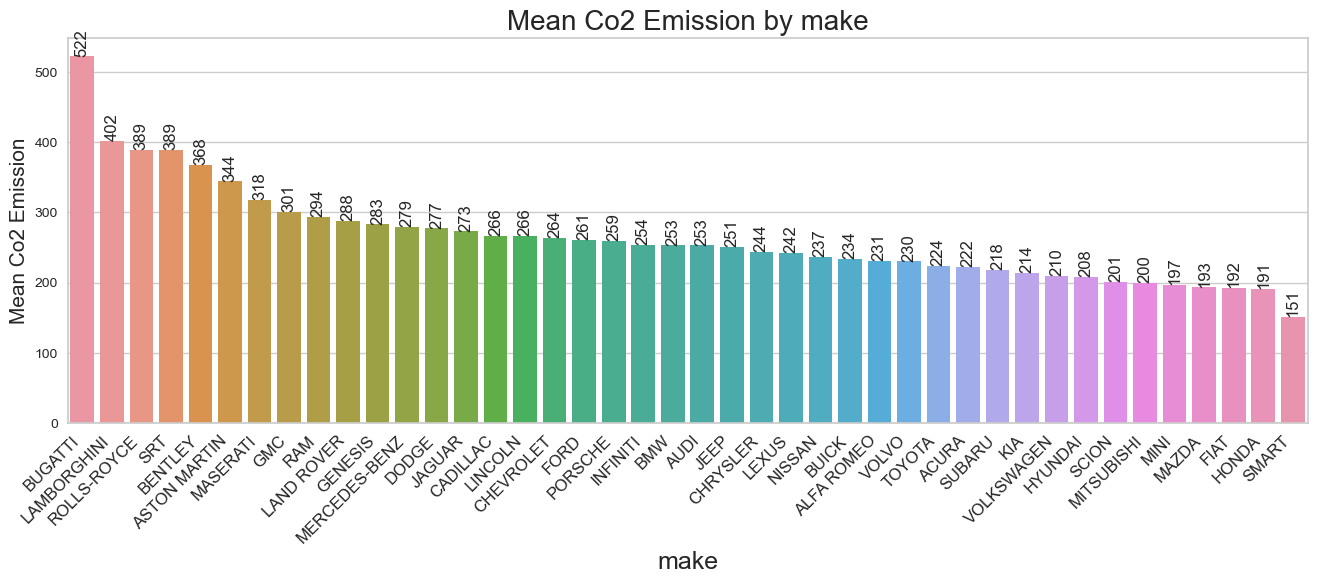

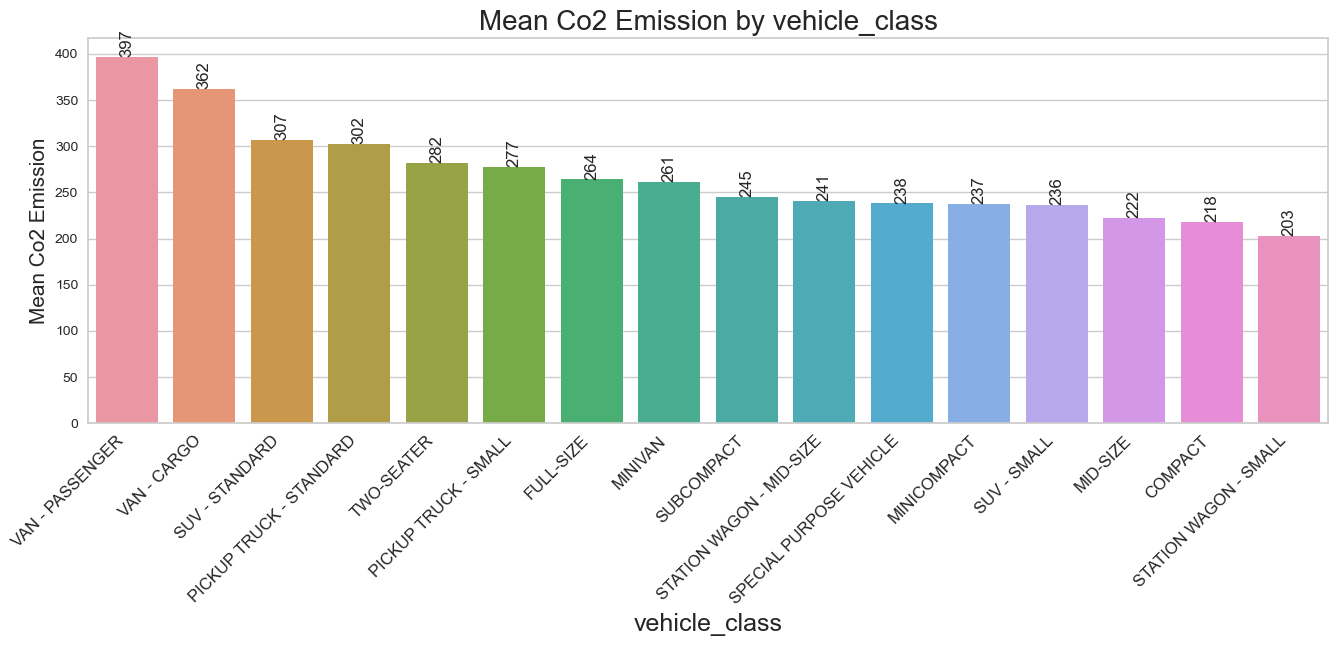

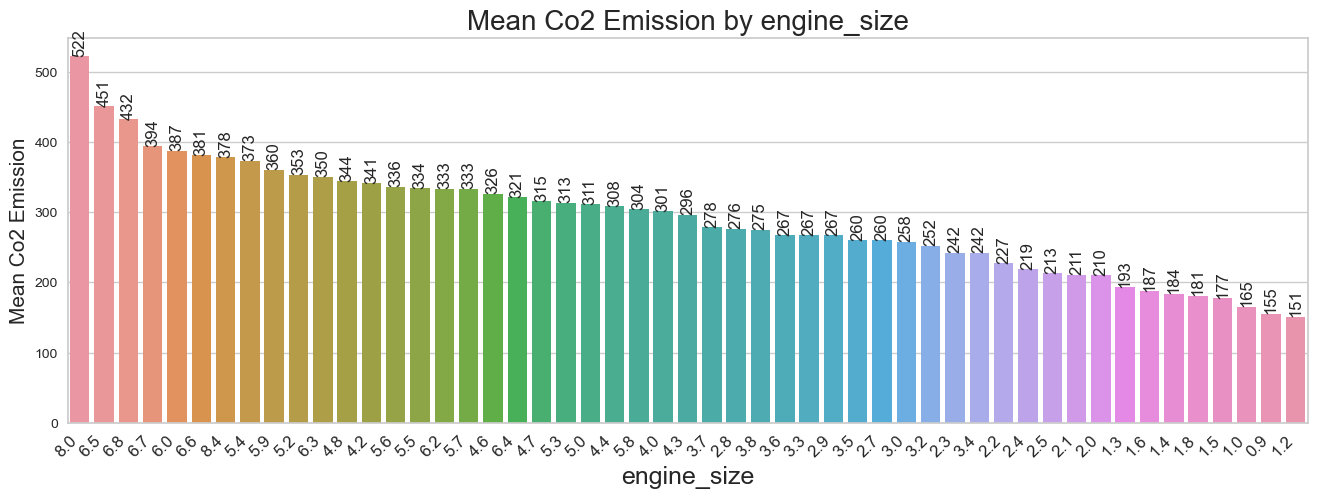

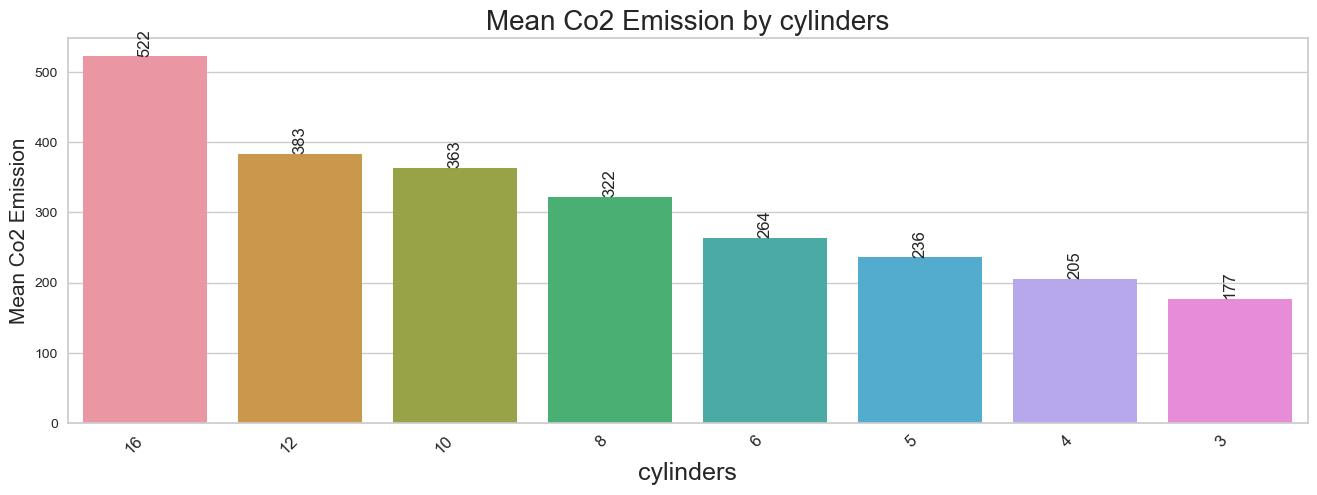

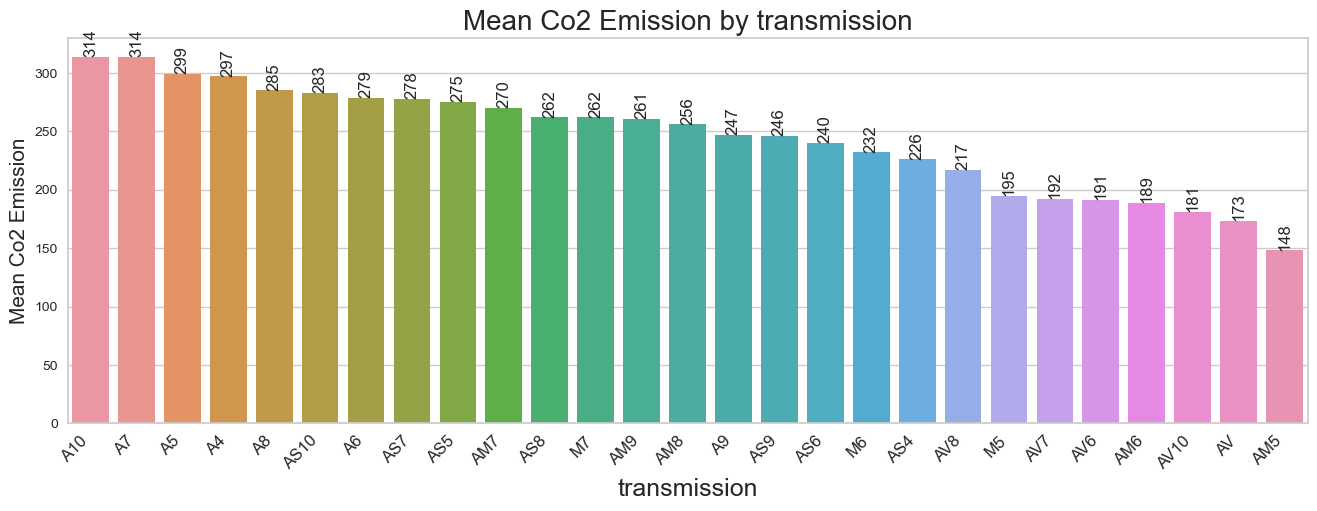

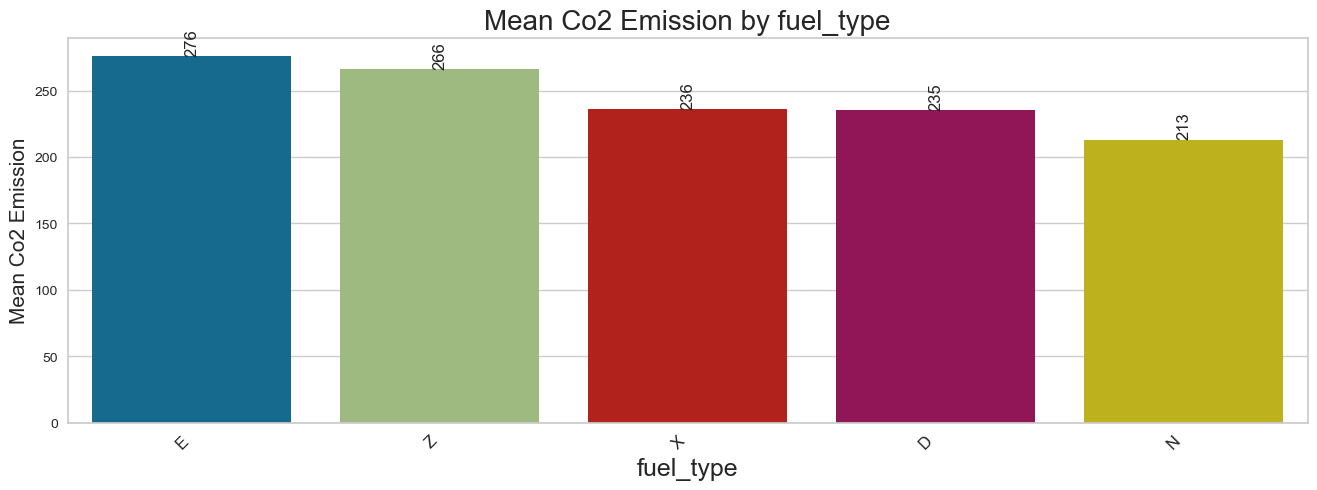

In [168]:
# Let's look at the relationship between our categorical attributes and the target variable

def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(16, 5))
        grouped_data = df.groupby(column)['co2'].mean().round().reset_index() # to adjust decimal point with round() just to have it here if necessary.
        grouped_data_sorted = grouped_data.sort_values(by='co2', ascending=False)
        ax = sns.barplot(x=column, y='co2', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
plot_bar_with_co2(df, cat_features)

As can be seen from the graphs above:

* Bugatti has the highest average Co2 emissions
* Large-volume vehicles have high CO2 emission averages
* C02 emission averages of high volume and cylinders engines are also high
* Ethanol is the fuel with the highest average CO2

# Numerical Features

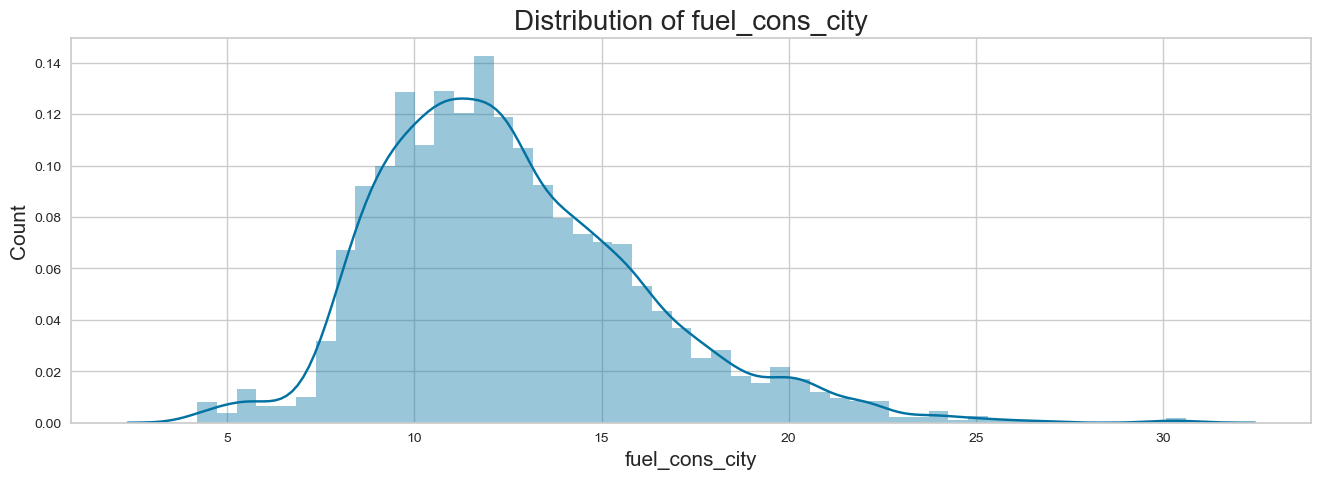

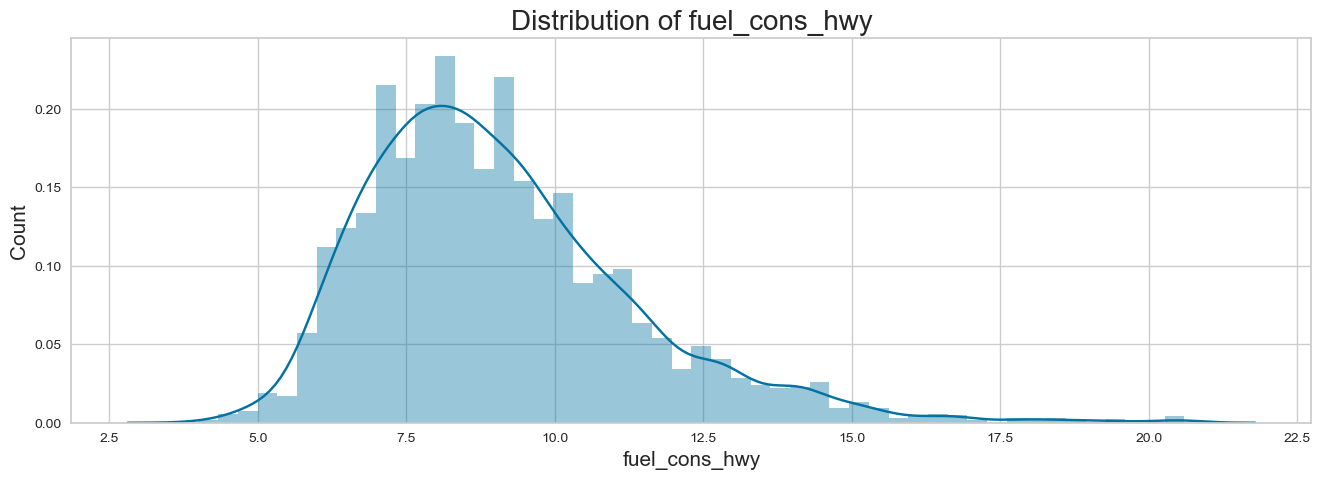

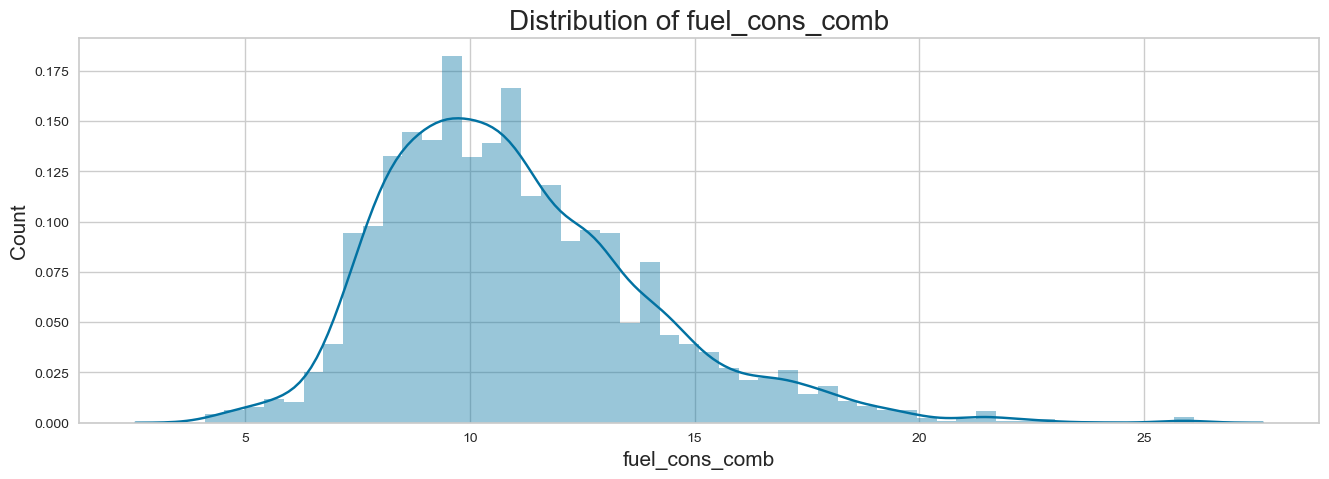

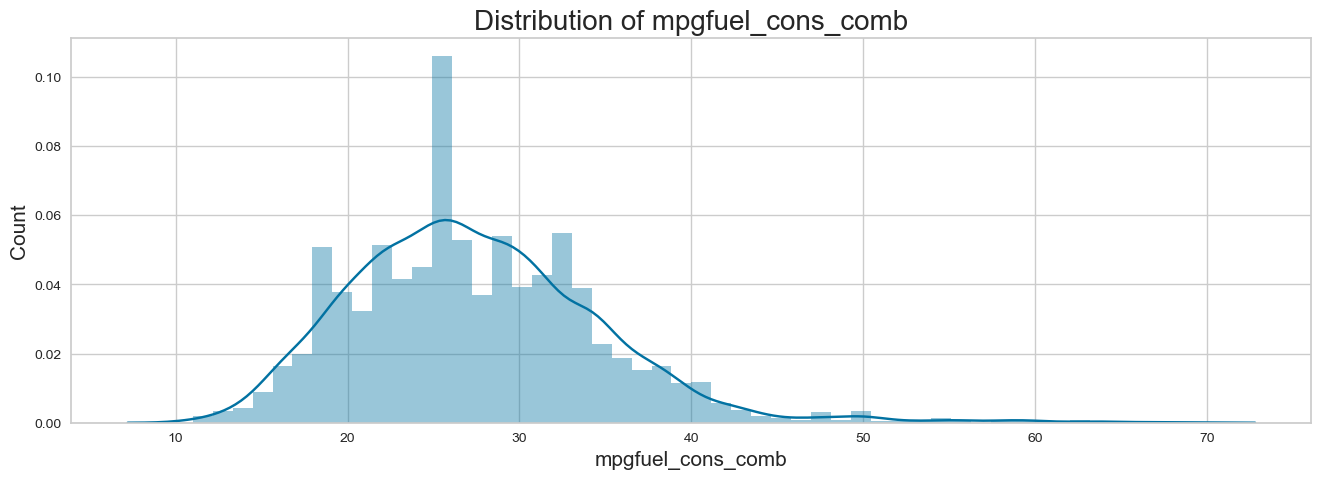

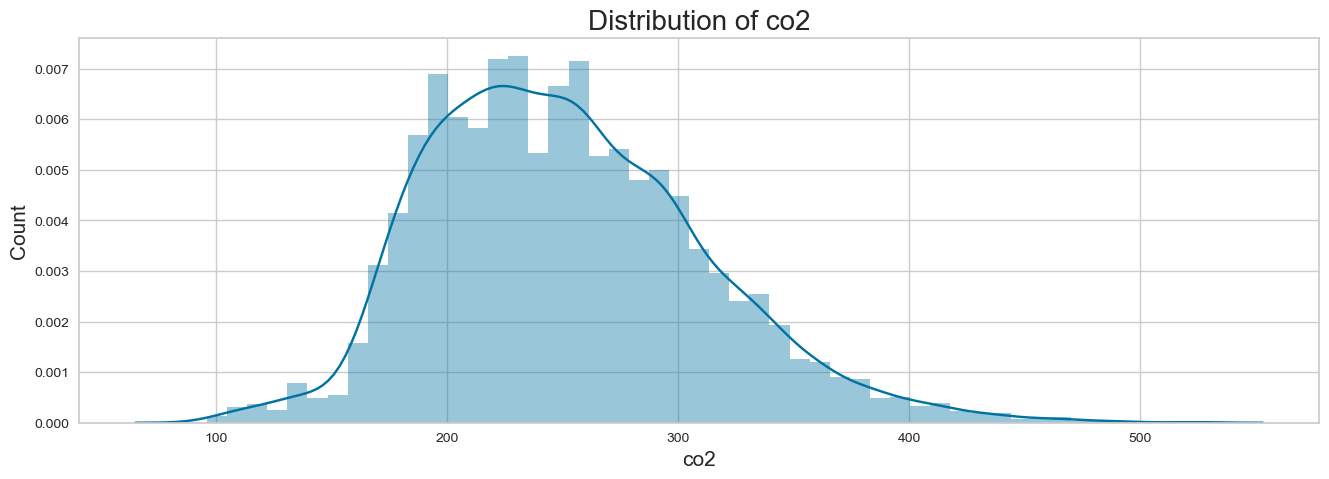

In [169]:
def numerical_dist(df, columns):
    for column in columns:
        plt.figure(figsize=(16, 5))
        sns.distplot(x=df[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Distribution of {column}', fontsize=20)
        plt.show()
        
num_features = ['fuel_cons_city', 'fuel_cons_hwy','fuel_cons_comb', 'mpgfuel_cons_comb', 'co2']

numerical_dist(df, num_features)

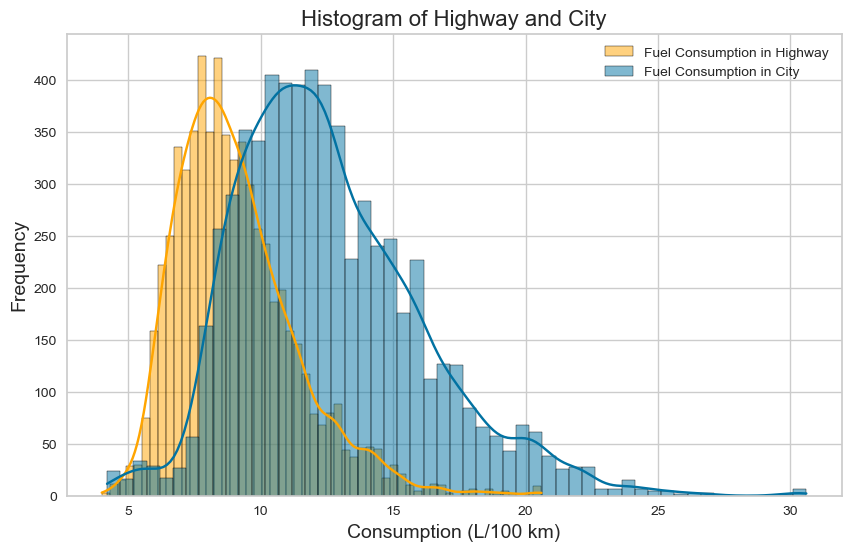

In [170]:
# Consumption of Highway and City

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'Histogram of Highway and City', fontsize=16)
plt.legend()
plt.show()


# Outliers Check

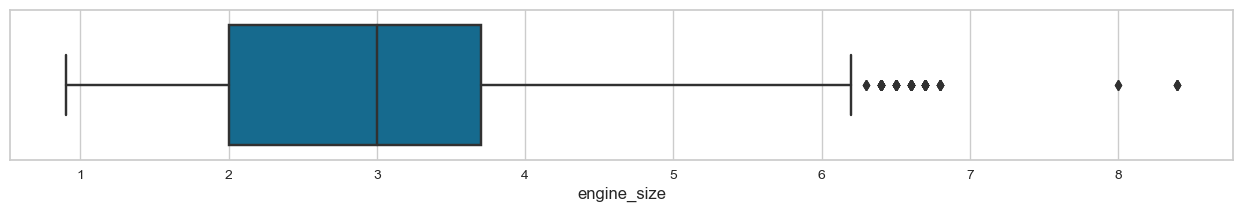

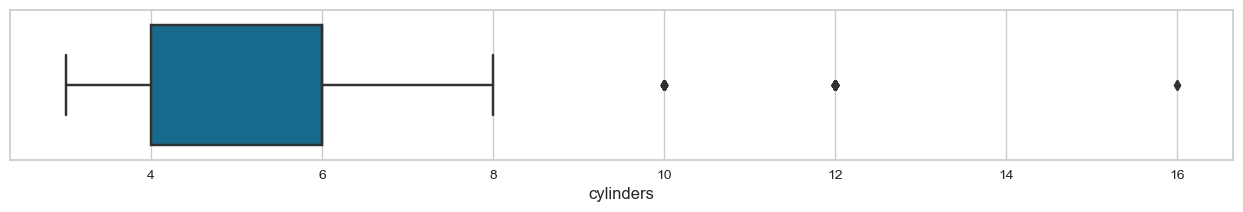

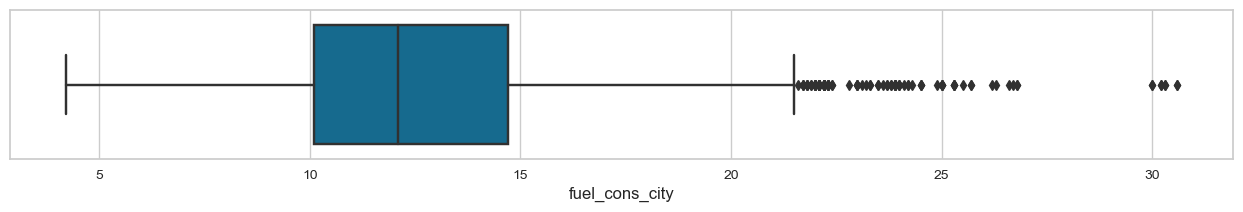

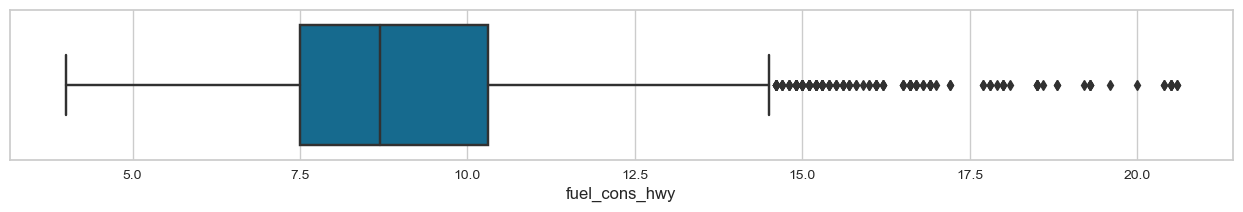

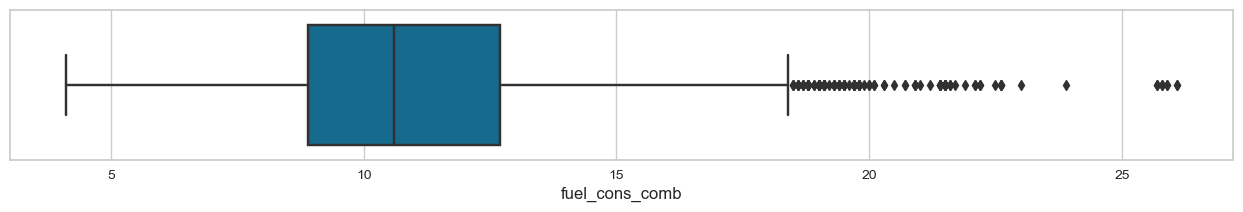

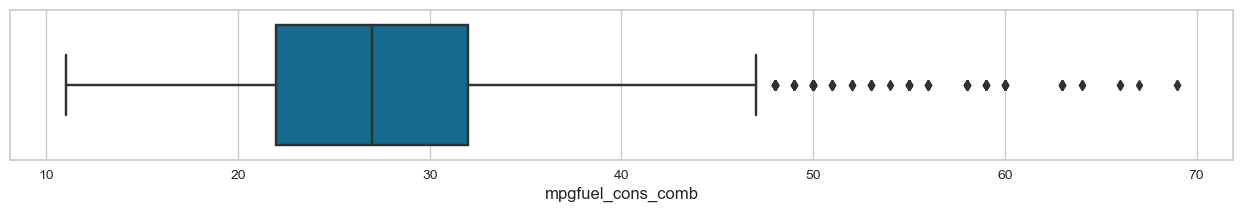

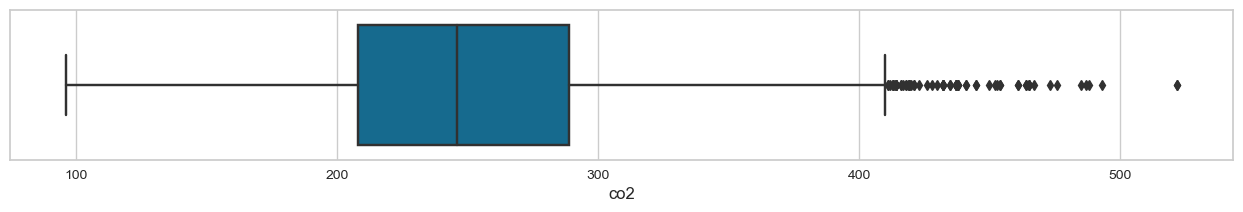

In [171]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(25,25))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=1.5) # default whis = 1.5 sometimes "3" can be used depend on the data. Just wrote it here to change easily in the future if necessary.
        
    plt.tight_layout()
    
    plt.show()

### Comment: There are some features with outliers especially "co2", and fuel consumptions for all highway city and combined versions. So, lets check the whis 3 value now to see how much those outliers different from the other data.

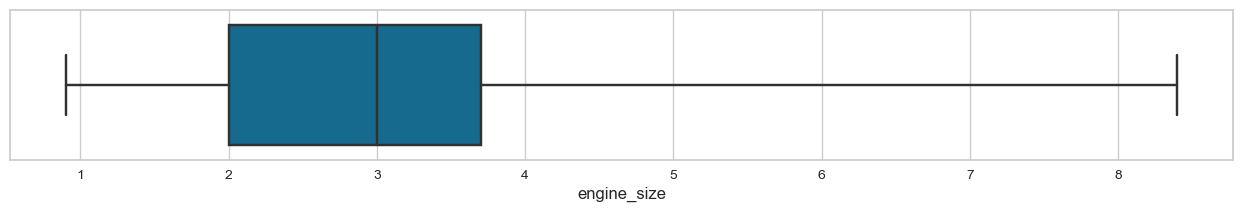

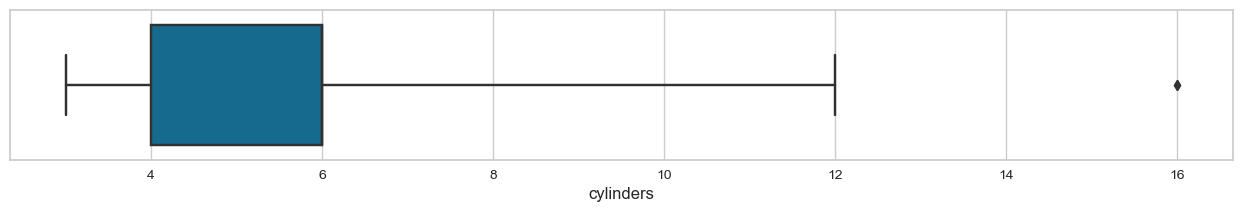

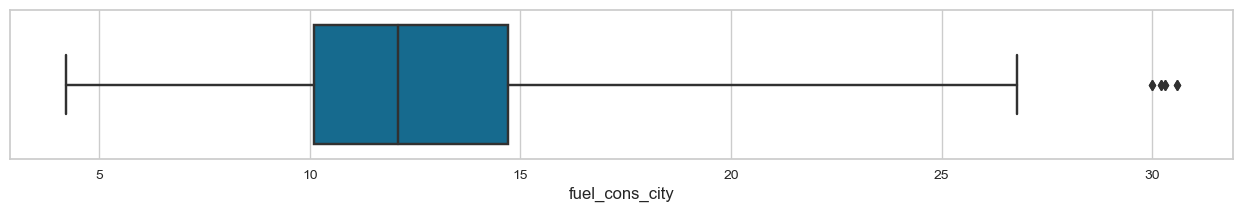

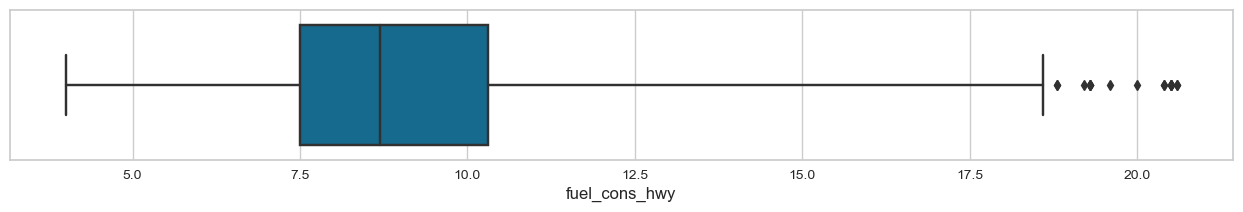

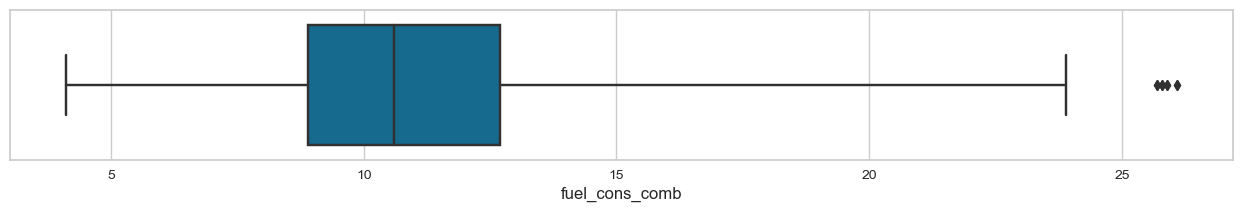

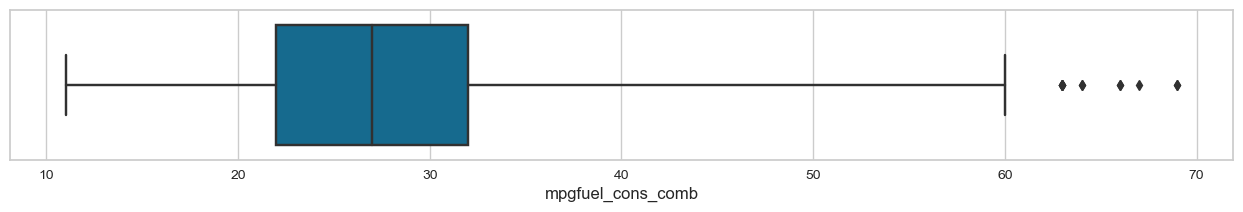

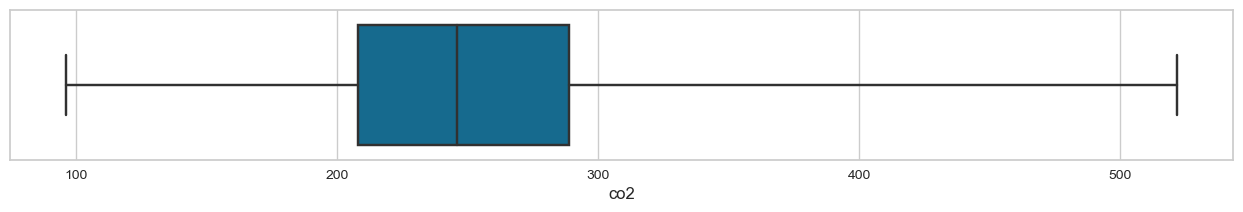

In [172]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(25,25))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) # default whis = 1.5 sometimes "3" can be used depend on the data. Just wrote it here to change easily in the future if necessary.
        
    plt.tight_layout()
    
    plt.show()

### Comment: Data is mostly within the limits when we use whis=3. 
### (IQR = Q3 - Q1, LOWER = Q1- [(Whis)* IQR] AND UPPER = Q3 + [(Whis)* IQR)] FOR THE OUTLIER CALTULATION.)

In [173]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

# Correlation

In [174]:
# Optional corr matrix.
# Let's color our correlation table 
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val < -0.90 and val > -1.00:
        color = "red"
    elif val == 1:
        color = "blue"
    elif val >= -0.30 and val <= 0:
        color = "green"
    elif val <= 0.30 and val > 0:
        color = "green"
    else:
        color = 'white'   ## white for vscode users ## black for jupyter notebook users.
    return f'color: {color}'

df.corr().style.applymap(color_red)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
fuel_cons_city,0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
fuel_cons_hwy,0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
fuel_cons_comb,0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
mpgfuel_cons_comb,-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
co2,0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


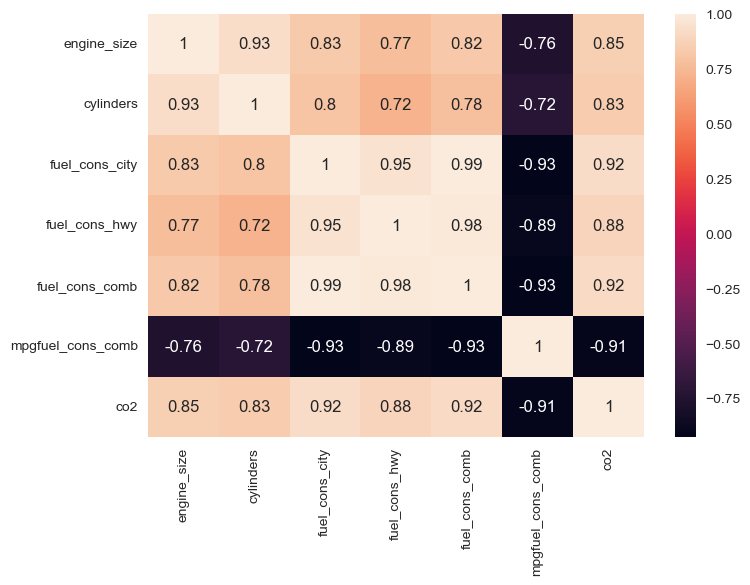

In [175]:
sns.heatmap(df.corr(), annot = True)
plt.show()

* Fuel Consumption Comb (mpg) is negatively correlated to all the features.
* All the other features are postively correlated with each other

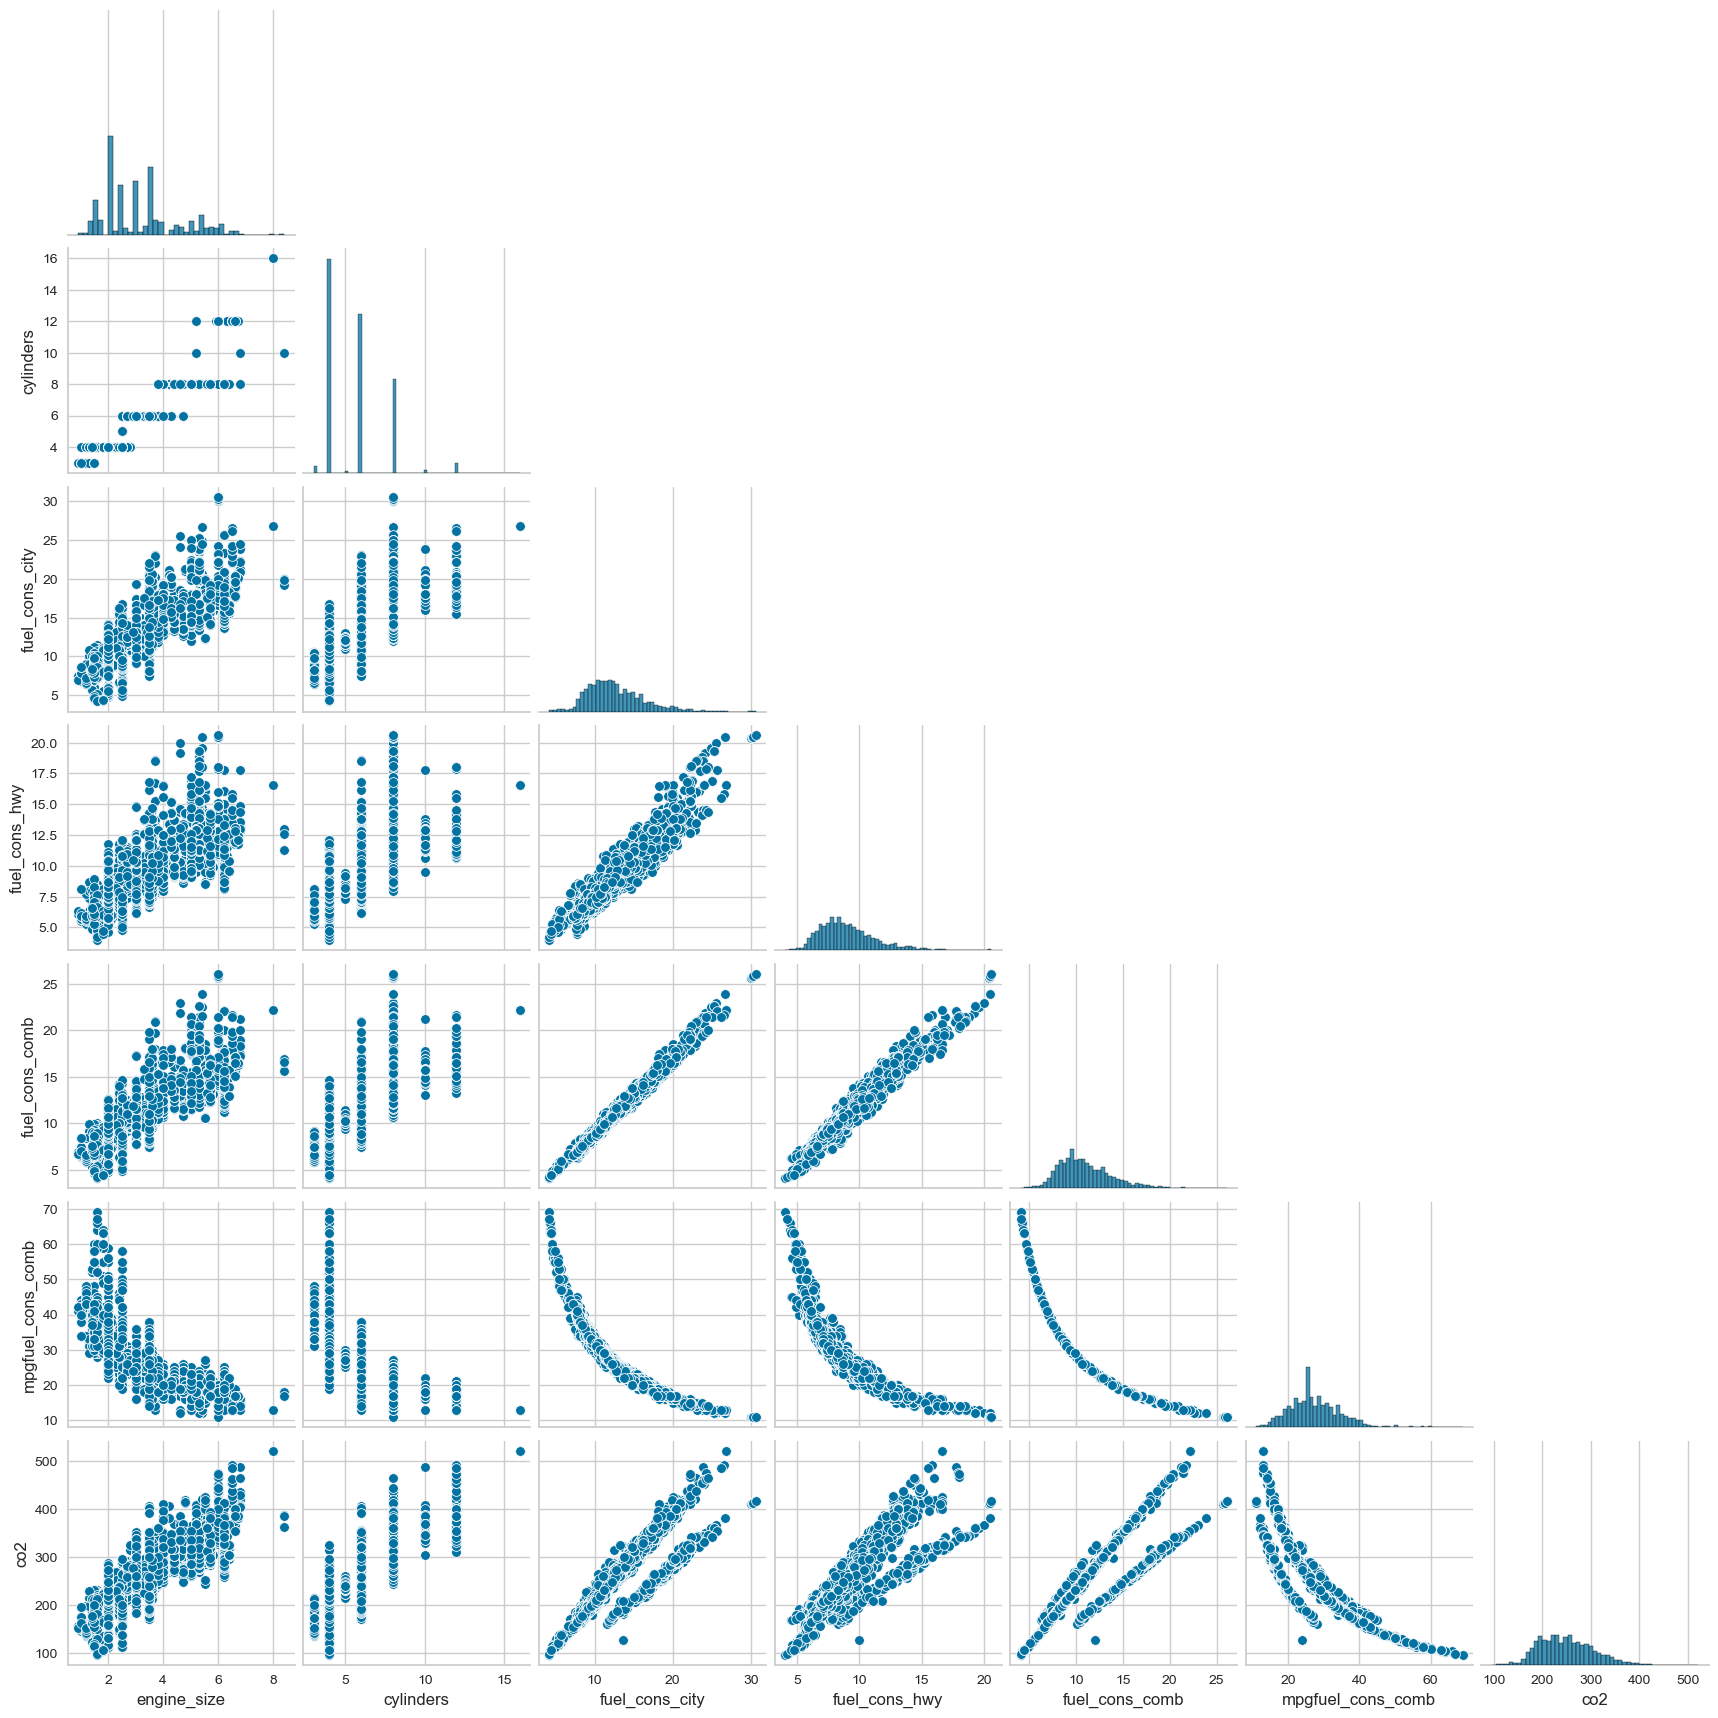

In [176]:
sns.pairplot(df, corner= True)
plt.show()

## It is clearly shown in the pairplot figures. Co2 amount has a correlation with all features. . Fuel consumption has the biggest correlation in all values city, highway or combined.

# Modelling

## Simple Linear Regression

## Train-Test Split

### Creating Simple linear regression model using engine size to predict co2 amount.

In [177]:
X = df[["engine_size"]]
y = df["co2"]

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling the data

In [180]:
#Scaling isleminde kullanacagimiz kutuphaneleri cagiralim;

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler() # burada 3 secenek var, biz standardizasyon yapacagimiz icin bunu secik
                          # MinMaxScaler; normaliozasyon icin kullanilacak

!!! **NOT:** "**X_train**" datasina **hem fit, hem de transform** uygularken, "**X_test**" datasina sadece transform uygulanir. 

!!! **y_train** ve **y_test** datalarina ise **scaling** islemleri **uygulanmaz!!!!!!!!** 

In [181]:
# fit'de "X_train" datasi uzerinden nasil scale (standardize) edecegini ogreniyor

scaler.fit(X_train)  

StandardScaler()

In [182]:
X_train_scaled = scaler.transform(X_train)  
X_train_scaled

array([[-0.84946717],
       [ 0.91379859],
       [ 1.35461502],
       ...,
       [-0.84946717],
       [-0.84946717],
       [-0.48212013]])

In [183]:
X_test_scaled = scaler.transform(X_test) 
X_test_scaled 

array([[-0.1147731 ],
       [-0.1147731 ],
       [ 0.32604334],
       ...,
       [ 1.20767621],
       [-0.99640598],
       [-0.84946717]])

### Manuel Lineer Regresyon (without scaling)

In [184]:
np.polyfit(X_train.engine_size, y_train, deg = 1) 

array([ 37.09665635, 133.72100106])

In [185]:
# y = b1 * X + b0

In [186]:
b1, b0 = np.polyfit(X_train.engine_size, y_train, deg = 1)

In [187]:
print("b1        :", b1)
print("b0        :", b0)

b1        : 37.09665634752171
b0        : 133.72100106036018


In [188]:
y_pred_test = b1 * X_test + b0

In [189]:
y_pred_train = b1 * X_train + b0

In [190]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [191]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [192]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7303755587668523
MAE 		: 23.16305195833035
MSE 		: 941.1730849777152
RMSE 		: 30.678544375144583


In [193]:
print("Model testing performance: ")  
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7316700768477532
MAE 		: 23.645582171230338
MSE 		: 968.328026057105
RMSE 		: 31.11796950408405


## Manuel linear regression with simple math has been done. Next scikit learn library will be used with scaling data.

### LinearRegression (scikit learn)

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [196]:
lin_reg.coef_      # b1

array([50.49265836])

In [197]:
lin_reg.intercept_ # b0

250.80616915422885

In [198]:
y_pred_test = lin_reg.predict(X_test_scaled)
y_pred_test

array([245.0109701 , 245.0109701 , 267.26896391, ..., 311.78495153,
       200.49498249, 207.91431376])

In [199]:
y_train_pred = lin_reg.predict(X_train_scaled)
y_train_pred

array([207.91431376, 296.94628899, 319.2042828 , ..., 207.91431376,
       207.91431376, 226.46264193])

In [200]:
print("Model testing performance: ")
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7316700768477529
MAE 		: 23.645582171230313
MSE 		: 968.3280260571065
RMSE 		: 31.117969504084076


In [201]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7303755587668523
MAE 		: 23.16305195833035
MSE 		: 941.1730849777152
RMSE 		: 30.678544375144583


### The difference between MAE and RMSE for both train and test values indicates outlier effect.
### R2_scores and RMSE values are very close, so there is no indication for overfitting.

In [202]:
my_dict = {"Actual": y_test, "pred": y_pred_test, "residual": y_test - y_pred_test}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,pred,residual
4484,299,245.010970,53.989030
5192,197,207.914314,-10.914314
6404,188,207.914314,-19.914314
6313,242,245.010970,-3.010970
7361,273,207.914314,65.085686
2705,179,207.914314,-28.914314
6324,250,245.010970,4.989030
683,294,263.559298,30.440702
3176,373,378.558933,-5.558933
3580,242,267.268964,-25.268964


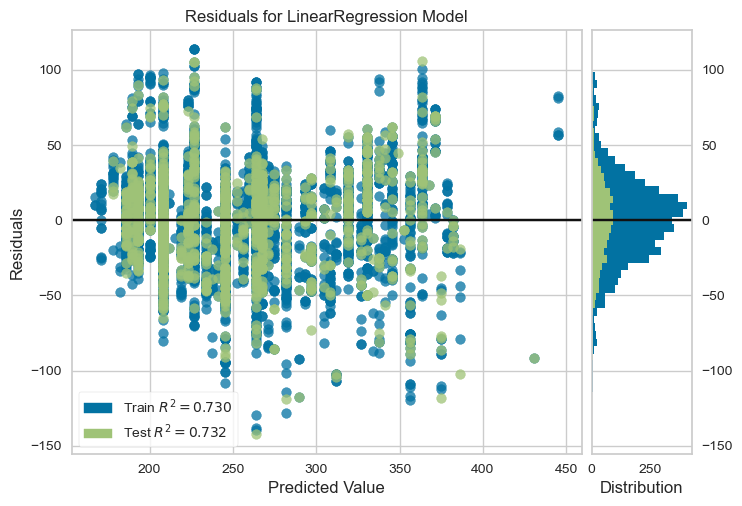

In [203]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

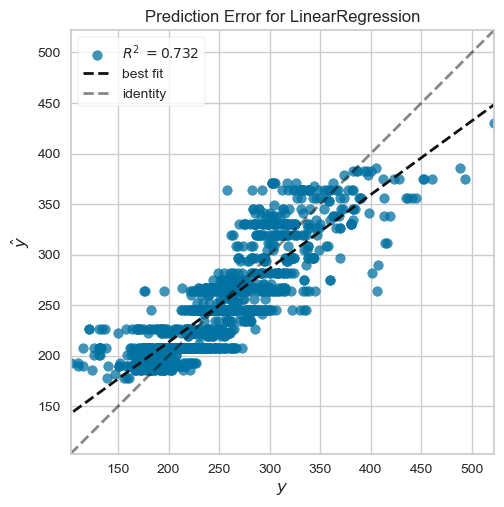

In [204]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Multiple Linear Regression

### Coding de single linear regression ile tek fark X =df[...] seçerken buraya hangi featurelar işleme dahil edilecekse yazmak.

### Train-Test Split

In [205]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [206]:
X = df[["engine_size", "cylinders", "fuel_cons_comb", "mpgfuel_cons_comb"]]
y = df["co2"]

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [208]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5025, 4)
y Train features shape: (5025,)
X Test features shape: (1257, 4)
y Test features shape: (1257,)


### Scaling the data

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [210]:
scaler.fit(X_train)

StandardScaler()

In [211]:
X_train_scaled = scaler.transform(X_train)  
X_train_scaled

array([[-0.84946717, -0.87380374, -0.61200082,  0.49144898],
       [ 0.91379859,  1.30528499,  0.57438064, -0.7518122 ],
       [ 1.35461502,  1.30528499,  0.4726908 , -0.61367207],
       ...,
       [-0.84946717, -0.87380374, -0.78148388,  0.62958911],
       [-0.84946717, -0.87380374, -1.01876018,  1.04400951],
       [-0.48212013, -0.87380374, -0.8153805 ,  0.76772925]])

In [212]:
X_test_scaled = scaler.transform(X_test)  
X_test_scaled

array([[-0.1147731 ,  0.21574063,  0.33710435, -0.47553194],
       [-0.1147731 ,  0.21574063, -0.20524146, -0.06111154],
       [ 0.32604334,  0.21574063,  0.60827725, -0.7518122 ],
       ...,
       [ 1.20767621,  1.30528499,  0.64217386, -0.7518122 ],
       [-0.99640598, -0.87380374, -0.91707034,  0.90586938],
       [-0.84946717, -0.87380374, -0.91707034,  0.90586938]])

In [217]:
multi_lin_reg = LinearRegression()

In [218]:
multi_lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [219]:
y_pred = multi_lin_reg.predict(X_test_scaled)
y_train_pred = multi_lin_reg.predict(X_train_scaled)

In [220]:
### For other regression models i is added to select multi or linear
def train_val(y_train, y_train_pred, y_test, y_pred, i):   
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [221]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
multiple_linear

,multi_train,multi_test
R2,0.903130,0.896037
mae,11.572414,12.252737
mse,338.140828,375.172273
rmse,18.388606,19.369364


### With multiple linear regression our R2 score is raised dramatically from around 0.73 to around 0.9. After the involvement of other features into calculations.
### Also there is no evidence for overfitting, when the results from train and test values compared.

# Polynomial multiple linear regression

In [316]:
def poly(d): 
    
    train_rmse_errors = [] 
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [317]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,18.617591,18.545445,4
2,16.085024,16.108820,14
3,14.590524,14.631789,34
4,13.207430,13.413902,69
5,12.361112,12.599163,125
6,11.322081,16.529953,209
7,15.007855,23.189197,329
8,23.269995,52.358711,494
9,12.749070,27.096609,714


### When polynomial degree hits 6 or higher the difference between train_rmse and test_rmse is increased rapidly and refer that there is an overfitting.
### Hence, Poly 5 or 4 is the best number that it should be used to reduce the Rmse parameters.

### Cross Validation

In [222]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv = 10)

In [223]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_r2', 'test_neg_mean_absolute_error', 'test_neg_mean_squared_error', 'test_neg_root_mean_squared_error'])

In [224]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.006983,0.002992,0.902731,-12.209656,-352.259668,-18.768582
2,0.003989,0.002995,0.899157,-12.344983,-398.737454,-19.968411
3,0.003987,0.001994,0.902429,-11.365960,-339.763712,-18.432681
4,0.001994,0.002019,0.886376,-12.575619,-413.857379,-20.343485
5,0.004111,0.001847,0.909827,-11.449870,-305.508919,-17.478813
6,0.001996,0.002992,0.896537,-11.965650,-358.585290,-18.936348
7,0.005013,0.002991,0.910616,-10.553769,-301.867416,-17.374332
8,0.002967,0.002991,0.898104,-10.795158,-303.458820,-17.420069
9,0.002992,0.001994,0.898662,-11.893609,-344.402366,-18.558081
10,0.005109,0.003867,0.919589,-10.774948,-281.985941,-16.792437


In [225]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                               0.902403
test_neg_mean_absolute_error        -11.592922
test_neg_mean_squared_error        -340.042697
test_neg_root_mean_squared_error    -18.407324
dtype: float64

## Ridge Regression

In [226]:
from sklearn.linear_model import Ridge, RidgeCV

In [227]:
ridge_model = Ridge(alpha=1, random_state=42) # alpha default = 1. Alfa arttikca modelimi daha fazla duzenle, katsayiari daha fazla kisitla demek olur. 
# Yukse alpha ile Ridge OVERFITT i azaltir ama UNDERFIT'e dusebiliriz. 
# Alpha dusukse kisitlama azalir, katsayilari daha az atar. OVERFIT'i duzeltemeyebilir. 
# Ridge degiskenlerin onem derecesini azaltiyor. Model complexitysi azalmiyor. Varyans azaliyor.

In [228]:
# Ridge regresyon modelini fit edelim; (Modeli egittim)

ridge_model.fit(X_train_scaled, y_train) #scale edilen X_train ve y_train ile fit ederiz

Ridge(alpha=1, random_state=42)

In [311]:
ridge_model.coef_[:20]

array([  7.57982293,  12.06831422,  16.10109676, -24.27766432])

In [153]:
y_pred = ridge_model.predict(X_test_scaled)

y_train_pred = ridge_model.predict(X_train_scaled)

In [154]:
ridge = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") 
ridge

,ridge_train,ridge_test
R2,0.903130,0.896038
mae,11.573300,12.253358
mse,338.140873,375.168772
rmse,18.388607,19.369274


In [155]:
result = pd.concat([multiple_linear, ridge], axis=1)
result

,multi_train,multi_test,ridge_train,ridge_test
R2,0.903130,0.896037,0.903130,0.896038
mae,11.572414,12.252737,11.573300,12.253358
mse,338.140828,375.172273,338.140873,375.168772
rmse,18.388606,19.369364,18.388607,19.369274


### Numbers after ridge regression model, are perfectly correlated with the multi-linear regression model.

### Just to have extra information in our notebook. Finding best alpha method with RidgeCV 

### RidgeCV

In [229]:
# Find the best alpha value with RidgeCV

alpha_space = np.linspace(0.01, 1, 100)
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [230]:
ridge_cv_model.alpha_          # Best alpha value

1.0

In [231]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [232]:
ridge_cv = train_val(y_train, y_train_pred, y_test, y_pred, "ridgeCV")
ridge_cv

,ridgeCV_train,ridgeCV_test
R2,0.903130,0.896037
mae,11.572276,12.252619
mse,338.140829,375.174000
rmse,18.388606,19.369409


In [233]:
ridge_cv_model.coef_[:20]          # Coefficients of insignificant variables approach zero

array([ 5.56056463,  6.57824251,  5.45532548, -3.35577758])

In [234]:
ridge_model.coef_[:20]

array([  7.57982293,  12.06831422,  16.10109676, -24.27766432])

In [235]:
result = pd.concat([result, ridge_cv], axis=1)
result

,multi_train,multi_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test
R2,0.903130,0.896037,0.903130,0.896038,0.903130,0.896037
mae,11.572414,12.252737,11.573300,12.253358,11.572276,12.252619
mse,338.140828,375.172273,338.140873,375.168772,338.140829,375.174000
rmse,18.388606,19.369364,18.388607,19.369274,18.388606,19.369409


### It is already alpha = 1 in this example (coincidence).

## Lasso Regression

In [237]:
# Lasso kutuphanesini cagiralim;

from sklearn.linear_model import Lasso, LassoCV

In [242]:
lasso_model = Lasso(alpha = 1, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [243]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [244]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.902797,0.895511
mae,11.703901,12.361883
mse,339.304323,377.072227
rmse,18.420215,19.418348


In [245]:
lasso_model.coef_             # As it is seen, the features with low importance are zero.

array([  7.44067458,  11.60831575,  16.04362307, -23.77466772])

In [246]:
nonzero_features = np.count_nonzero(lasso_model.coef_)         # non-zero coefficients  
nonzero_features

4

In [247]:
result = pd.concat([result, lss], axis=1)
result

,multi_train,multi_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test
R2,0.903130,0.896037,0.903130,0.896038,0.903130,0.896037,0.902797,0.895511
mae,11.572414,12.252737,11.573300,12.253358,11.572276,12.252619,11.703901,12.361883
mse,338.140828,375.172273,338.140873,375.168772,338.140829,375.174000,339.304323,377.072227
rmse,18.388606,19.369364,18.388607,19.369274,18.388606,19.369409,18.420215,19.418348


### LassoCV

In [248]:
# Find the best alpha value with RidgeCV

lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=1000000, random_state=42)
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=1000000, random_state=42)

In [249]:
lasso_cv_model.alpha_             # Best alpha value

0.01

In [250]:
y_pred = lasso_cv_model.predict(X_test_scaled)           # Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [251]:
lasso_cv = train_val(y_train, y_train_pred, y_test, y_pred, "lassoCV")
lasso_cv

,lassoCV_train,lassoCV_test
R2,0.903130,0.896035
mae,11.572862,12.252794
mse,338.140977,375.179309
rmse,18.388610,19.369546


* R2 score increased with coefficient increase 

In [252]:
lasso_cv_model.coef_ 

array([  7.5791246 ,  12.05894504,  16.10572803, -24.27552559])

In [253]:
nonzero_features = np.count_nonzero(lasso_cv_model.coef_)         # non-zero coefficients  
nonzero_features

4

In [254]:
result = pd.concat([result, lasso_cv], axis=1)
result

,multi_train,multi_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test,lassoCV_train,lassoCV_test
R2,0.903130,0.896037,0.903130,0.896038,0.903130,0.896037,0.902797,0.895511,0.903130,0.896035
mae,11.572414,12.252737,11.573300,12.253358,11.572276,12.252619,11.703901,12.361883,11.572862,12.252794
mse,338.140828,375.172273,338.140873,375.168772,338.140829,375.174000,339.304323,377.072227,338.140977,375.179309
rmse,18.388606,19.369364,18.388607,19.369274,18.388606,19.369409,18.420215,19.418348,18.388610,19.369546


### After ridge and lasso we don't see much difference in the results. There is no overfitting or underfitting for our model.

## ElasticNet Regression

* Hem L1, hem de L2 bir arada kullaniliyor. 
* Alpha<0.5 ise Ridge, Alpha>0.5 ise LASSO yapiyor.  


* !!! Elastic neti sadece Linear modelde kullaniriz, diger modeller bunu icsel olarak yapiyor. Bunu yapmaya gerek yok. 

In [255]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [256]:
elastic_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [257]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [258]:
elastic = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
elastic

,elastic_train,elastic_test
R2,0.882328,0.875961
mae,14.577764,15.095489
mse,410.754574,447.623644
rmse,20.267081,21.157118


In [259]:
elastic_model.coef_

array([ 10.70301736,  10.58884729,  14.64510134, -15.87829013])

In [260]:
result = pd.concat([result, elastic], axis=1)
result

,multi_train,multi_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test,lassoCV_train,lassoCV_test,elastic_train,elastic_test
R2,0.903130,0.896037,0.903130,0.896038,0.903130,0.896037,0.902797,0.895511,0.903130,0.896035,0.882328,0.875961
mae,11.572414,12.252737,11.573300,12.253358,11.572276,12.252619,11.703901,12.361883,11.572862,12.252794,14.577764,15.095489
mse,338.140828,375.172273,338.140873,375.168772,338.140829,375.174000,339.304323,377.072227,338.140977,375.179309,410.754574,447.623644
rmse,18.388606,19.369364,18.388607,19.369274,18.388606,19.369409,18.420215,19.418348,18.388610,19.369546,20.267081,21.157118


### ElasticNET CV

In [261]:
# Find the best alpha and l1_ratio values

elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, 
                                max_iter = 1000000,random_state=42)

In [262]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=1000000,
             random_state=42)

In [263]:
elastic_cv_model.alpha_          # Best alpha value

0.01

In [264]:
elastic_cv_model.l1_ratio_       # Best l1_ratio value (l1_ratio : ridge as it approaches 0, lasso as it approaches 1)

0.1

In [265]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [266]:
elastic_cv = train_val(y_train, y_train_pred, y_test, y_pred, "elasticCV")
elastic_cv

,elasticCV_train,elasticCV_test
R2,0.903107,0.896057
mae,11.614062,12.282253
mse,338.222383,375.102773
rmse,18.390823,19.367570


In [274]:
nonzero_features = np.count_nonzero(elastic_cv_model.coef_)         # non-zero coefficients  
nonzero_features                                                   

4

In [268]:
result = pd.concat([result, elastic_cv], axis=1)   
result

,multi_train,multi_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test,lassoCV_train,lassoCV_test,elastic_train,elastic_test,elasticCV_train,elasticCV_test
R2,0.903130,0.896037,0.903130,0.896038,0.903130,0.896037,0.902797,0.895511,0.903130,0.896035,0.882328,0.875961,0.903107,0.896057
mae,11.572414,12.252737,11.573300,12.253358,11.572276,12.252619,11.703901,12.361883,11.572862,12.252794,14.577764,15.095489,11.614062,12.282253
mse,338.140828,375.172273,338.140873,375.168772,338.140829,375.174000,339.304323,377.072227,338.140977,375.179309,410.754574,447.623644,338.222383,375.102773
rmse,18.388606,19.369364,18.388607,19.369274,18.388606,19.369409,18.420215,19.418348,18.388610,19.369546,20.267081,21.157118,18.390823,19.367570


In [269]:
result.T

,R2,mae,mse,rmse
multi_train,0.903130,11.572414,338.140828,18.388606
multi_test,0.896037,12.252737,375.172273,19.369364
ridge_train,0.903130,11.573300,338.140873,18.388607
ridge_test,0.896038,12.253358,375.168772,19.369274
ridgeCV_train,0.903130,11.572276,338.140829,18.388606
ridgeCV_test,0.896037,12.252619,375.174000,19.369409
lasso_train,0.902797,11.703901,339.304323,18.420215
lasso_test,0.895511,12.361883,377.072227,19.418348
lassoCV_train,0.903130,11.572862,338.140977,18.388610
lassoCV_test,0.896035,12.252794,375.179309,19.369546


## Grid Search

* l1 = LASSO

* l2 = RIDGE

* l1 = 05 = lasso + ridge

* Amacimiz modeldeki hyper parametreleri otomatik (icsel) olarak elde etmek. Hangi kombinasyon en iyi sonucu veryor? Buna bakiyoruz. 


* Grid Search en iyi hyper parametre setini verecek bize. 


In [289]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [290]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [291]:
grid_model = GridSearchCV(estimator = elastic_model, 
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =5, verbose =2)

In [292]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [293]:
grid_model.best_params_ 

{'alpha': 0.01, 'l1_ratio': 0.1}

In [294]:
grid_model.best_index_                # Let's access the index number of the best candidate

0

In [295]:
grid_model.best_score_

-18.41756657626857

In [296]:
best_model = grid_model.best_estimator_  # Modeli tanımladık

In [297]:
best_model.coef_    # Katsayıları getirir

array([  7.96111043,  11.80997892,  16.34029982, -23.74272545])

### Using Best Hyper Parameters From GridSearch

In [298]:
y_pred = grid_model.predict(X_test_scaled)          # ElasticNet(alpha= 0.01, l1_ratio= 0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [299]:
gridsearch = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gridsearch

,GridSearch_train,GridSearch_test
R2,0.903107,0.896057
mae,11.614062,12.282253
mse,338.222383,375.102773
rmse,18.390823,19.367570


In [300]:
result = pd.concat([result, gridsearch], axis=1)   
result

,multi_train,multi_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test,lassoCV_train,lassoCV_test,elastic_train,elastic_test,elasticCV_train,elasticCV_test,GridSearch_train,GridSearch_test
R2,0.903130,0.896037,0.903130,0.896038,0.903130,0.896037,0.902797,0.895511,0.903130,0.896035,0.882328,0.875961,0.903107,0.896057,0.903107,0.896057
mae,11.572414,12.252737,11.573300,12.253358,11.572276,12.252619,11.703901,12.361883,11.572862,12.252794,14.577764,15.095489,11.614062,12.282253,11.614062,12.282253
mse,338.140828,375.172273,338.140873,375.168772,338.140829,375.174000,339.304323,377.072227,338.140977,375.179309,410.754574,447.623644,338.222383,375.102773,338.222383,375.102773
rmse,18.388606,19.369364,18.388607,19.369274,18.388606,19.369409,18.420215,19.418348,18.388610,19.369546,20.267081,21.157118,18.390823,19.367570,18.390823,19.367570


In [301]:
result.T

,R2,mae,mse,rmse
multi_train,0.903130,11.572414,338.140828,18.388606
multi_test,0.896037,12.252737,375.172273,19.369364
ridge_train,0.903130,11.573300,338.140873,18.388607
ridge_test,0.896038,12.253358,375.168772,19.369274
ridgeCV_train,0.903130,11.572276,338.140829,18.388606
ridgeCV_test,0.896037,12.252619,375.174000,19.369409
lasso_train,0.902797,11.703901,339.304323,18.420215
lasso_test,0.895511,12.361883,377.072227,19.418348
lassoCV_train,0.903130,11.572862,338.140977,18.388610
lassoCV_test,0.896035,12.252794,375.179309,19.369546


## Final Model

### In this notebook Polynomial degree is just shown to learn how it works and how to use it. however, in the logistic regression parameters of our values are compared with multiple linear regression for polynomial degree 1.

### The results from the Lasso, Ridge, Elastic-net and GridSearch values are very close. Since, the feature numbers are low and most features especially fuel consumptions are highly correlated and dependent with each other and the target variable. Logistic regression models didn't make much difference especially when the polynomial degree 1 is used with low number of features.
### Hence,  any model can be used, since they are all very close to each other.

In [305]:
final_model = multiple_linear
final_model

,multi_train,multi_test
R2,0.903130,0.896037
mae,11.572414,12.252737
mse,338.140828,375.172273
rmse,18.388606,19.369364


## Feature importances with Ridge

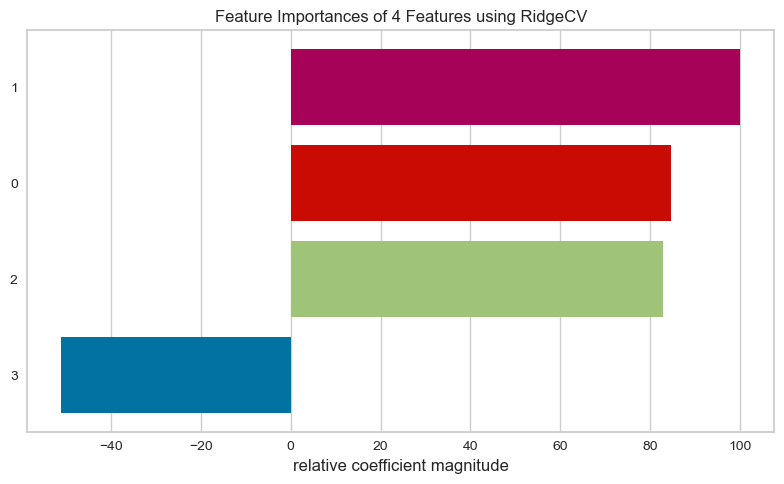

<Axes: title={'center': 'Feature Importances of 4 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [309]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz  ## figsize gibi işlem yapıyor

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(800, 500))
viz.fit(X_train_scaled, y_train)
viz.show()

## Feature importances with Lasso

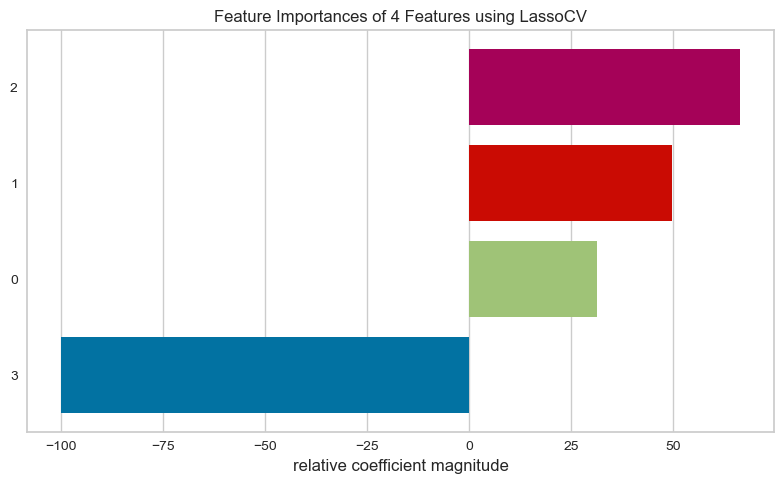

<Axes: title={'center': 'Feature Importances of 4 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [310]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(800, 500))
viz.fit(X_train_scaled, y_train)
viz.show()